<a href="https://colab.research.google.com/github/GabrielaRomoM/DSP2024-2/blob/main/Clase_13/11/24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

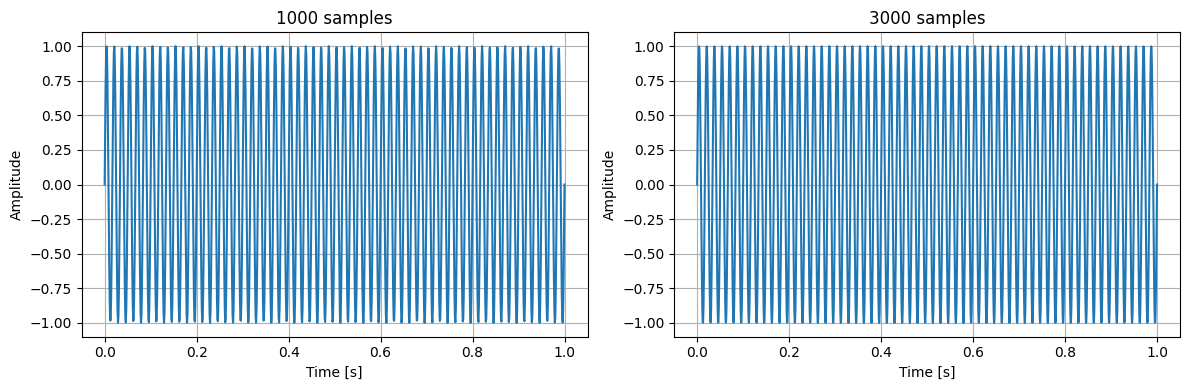

In [2]:
# Parameters
f = 60  # Frequency of the sine waves in Hz
t = 1   # Duration in seconds
fs1 = 1000
fs2 = 3000

# Time arrays
t1 = np.linspace(0, t, 1000)  # 1000 samples per second
t2 = np.linspace(0, t, 3000)  # 3000 samples per second

# Generate the sine waves
s1 = np.sin(2 * np.pi * f * t1)
s2 = np.sin(2 * np.pi * f * t2)

# Plot the signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t1, s1)
plt.title("1000 samples")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(t2, s2)
plt.title("3000 samples")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


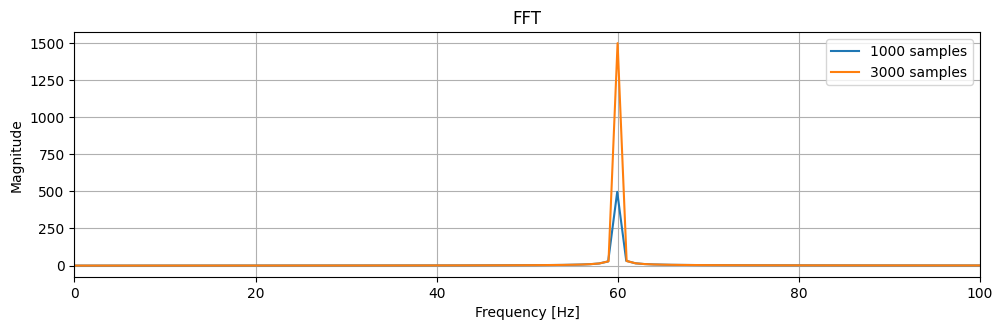

In [3]:
fft_signal1 = np.fft.fft(s1)
fft_signal2 = np.fft.fft(s2)

freq1 = np.fft.fftfreq(len(t1), t1[1] - t1[0])
freq2 = np.fft.fftfreq(len(t2), t2[1] - t2[0])

pf1 = freq1[:len(freq1)//2]
pf2 = freq2[:len(freq2)//2]
pfs1 = np.abs(fft_signal1)[:len(freq1)//2]
pfs2 = np.abs(fft_signal2)[:len(freq2)//2]

# Plot the FFT of both signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(pf1, pfs1)
plt.plot(pf2, pfs2)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.title("FFT")
plt.legend(["1000 samples", "3000 samples"])
plt.tight_layout()
plt.xlim(0, 100)
plt.show()

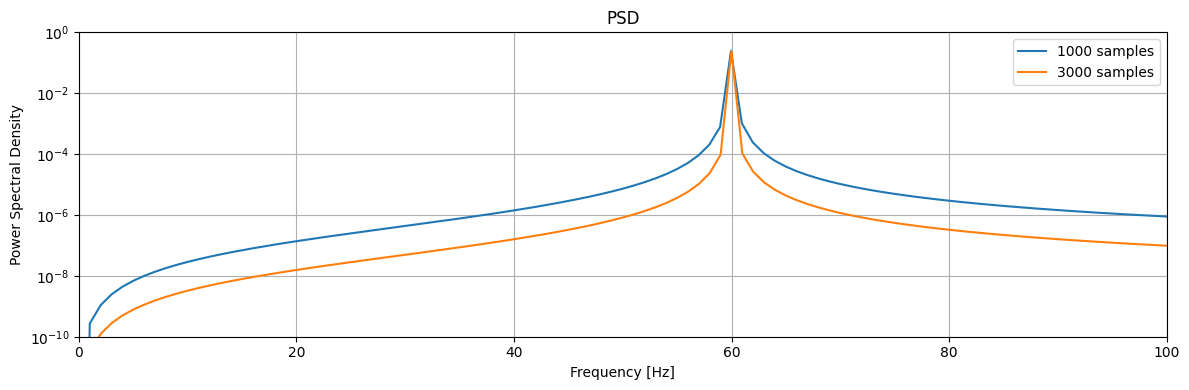

In [13]:
# Calculate the PSD
psd1 = (np.abs(pfs1) ** 2) / (fs1 * len(t1))
psd2 = (np.abs(pfs2) ** 2) / (fs2 * len(t2))

# Plot the PSD of both signals
plt.figure(figsize=(12, 4))
plt.semilogy(pf1, psd1, label ="1000 samples")
plt.semilogy(pf2, psd2, label ="3000 samples")
plt.title("PSD")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power Spectral Density")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(1e-10, 1e-0)
plt.legend()
plt.tight_layout()
plt.show()